<a href="https://colab.research.google.com/github/tharushaRukshanRavindra/SDGP/blob/main/manual_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
print(tf. __version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
import pathlib
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

2.7.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#giving the path of the data set main data set ps-not to the sub directories
image_path = "/content/drive/MyDrive/MOCK_DATA/"

In [8]:
a_path = "/content/drive/MyDrive/MOCK_DATA/A"
a_length = len(list(glob(a_path + "/*.jpg")))
print(a_length)

60


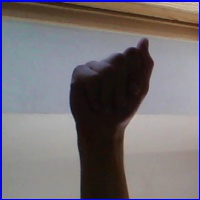

In [9]:
A = list(glob(a_path + "/*.jpg"))
PIL.Image.open(str(A[0]))

In [10]:
#expected 300 - all the images has been loaded 
all_images = len(list(glob(image_path + "*/*.jpg")))
print(all_images)

300


In [11]:
batch_size = 64
img_height = 180
img_width = 180

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  image_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 5 classes.
Using 240 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  image_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 5 classes.
Using 60 files for validation.


In [14]:
#to confirm the classes name
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E']


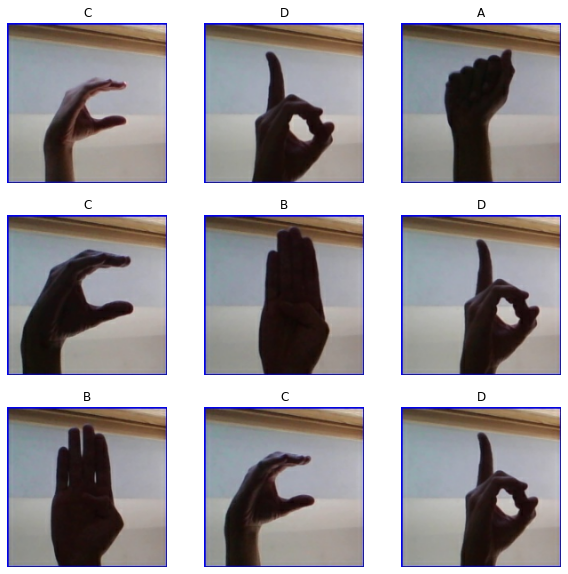

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [28]:
model = Models.Sequential()
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

#https://www.tensorflow.org/tutorials/images/classification#compile_the_model
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb#scrollTo=SbtTDYhOHZb6

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_25 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 27, 27, 180)       291780    
                                                                 
 conv2d_27 (Conv2D)          (None, 25, 25, 140)       226940    
                                                                 
 conv2d_28 (Conv2D)          (None, 23, 23, 100)       126100    
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
